URL : https://archive.ics.uci.edu/ml/index.php

#### Common Data Sets

    Titanic
    Tips
    Flights
    MPG
    Iris
    Adult
    Dry Bean Dataset
    Wine / Wine Quality
    Rice 
    Heart Disease
    Bank Marketing
    Breast Cancer Wisonsin
    Car Evaluation
    Kaggle 
    Data Science Job Salaries
    

### Outline 

    Introduction Machine Learning
    
        What is Machine Learning
        Types of Machine Learning
        Steps used in a Machine Learning Projects 

#### what is machine learning ? 

  Machine Learning is set of computer programs which can improve their performance `P` on a given task `T` which expeience `E`

In [1]:
import seaborn as sns
# Tips dataset 
from sklearn.linear_model import LinearRegression
# LinearRegression -> Machine Learning Algorithms 
from sklearn.model_selection import train_test_split
# train_test_split -> Random Sampling
import matplotlib.pyplot as plt

In [2]:
mpg = sns.load_dataset('mpg').dropna()

In [3]:
mpg.head()
# y => mpg
# X ==> cylinders, displancement, horsepower, weight, acceleration

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


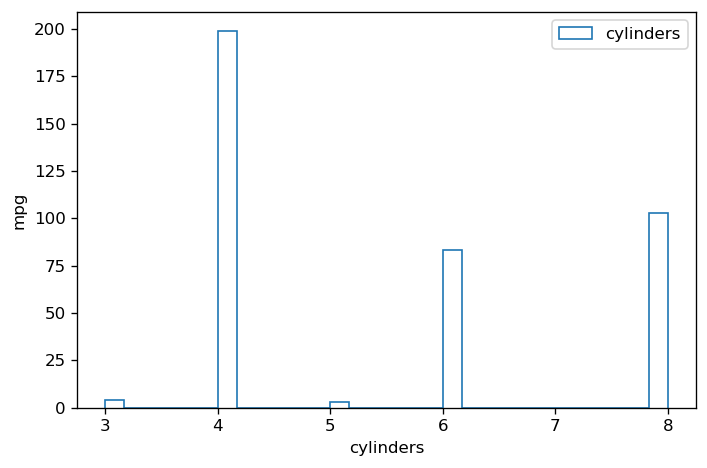

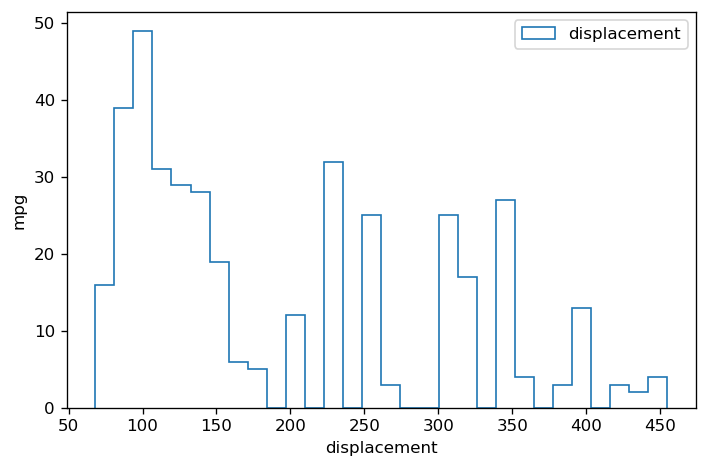

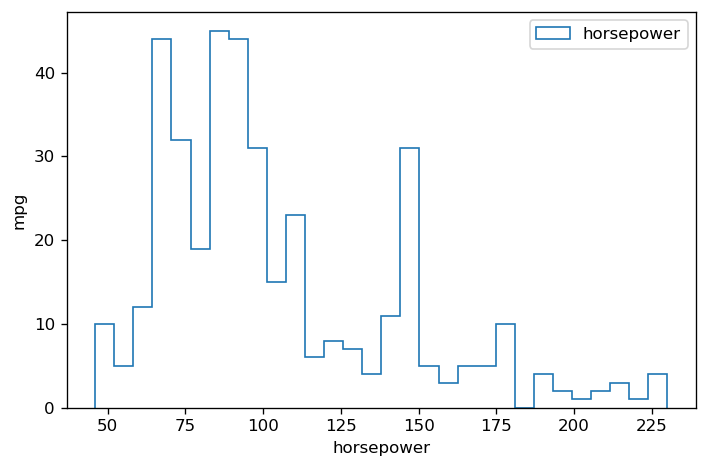

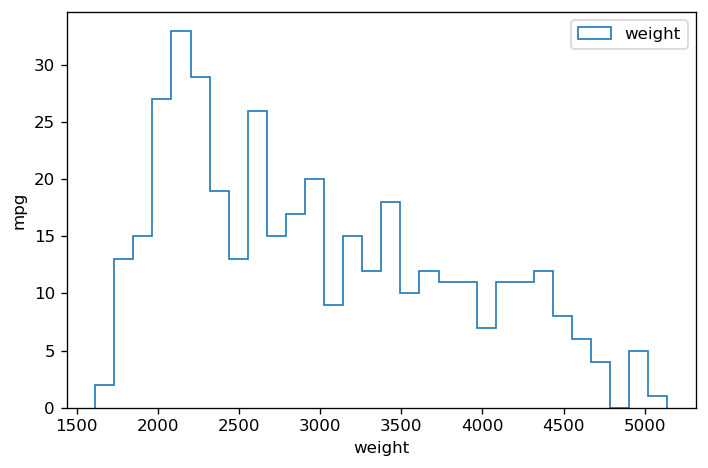

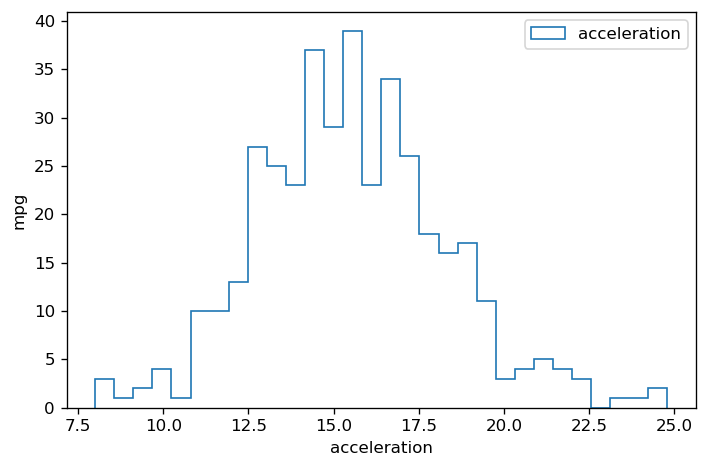

In [32]:
for col in ["cylinders", "displacement", "horsepower", "weight", "acceleration"]:
    plt.figure(dpi=120)
    plt.hist(col, data=mpg, label=f"{col}", bins=30, histtype='step')
    plt.xlabel(col)
    plt.ylabel("mpg")
    plt.legend()
    plt.tight_layout()
    plt.show()

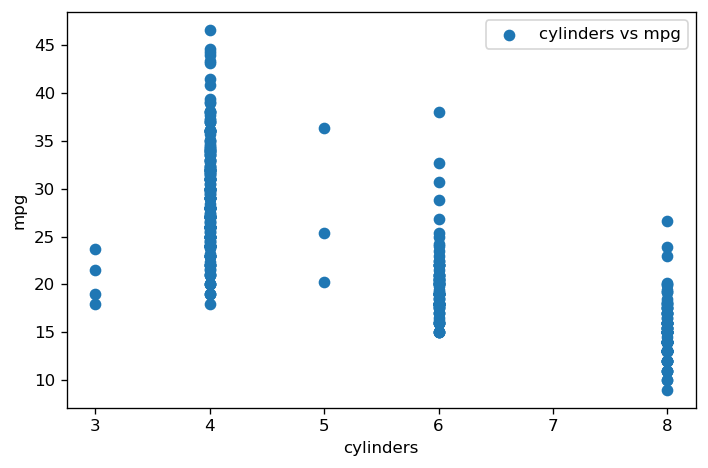

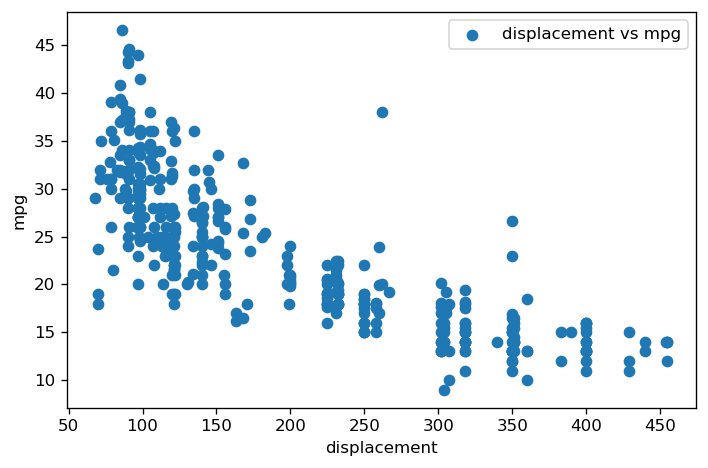

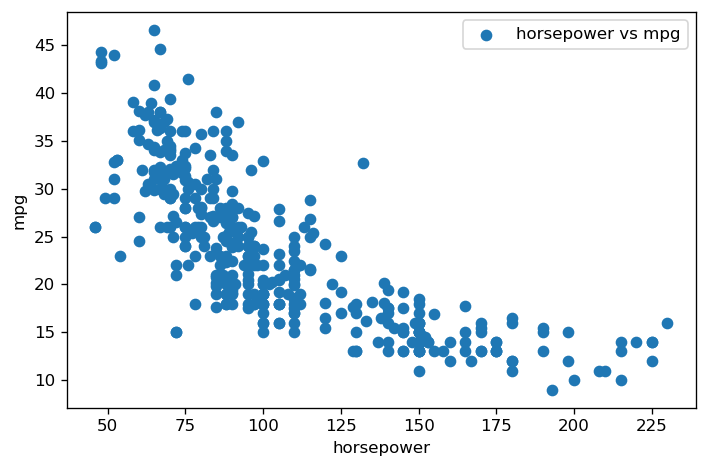

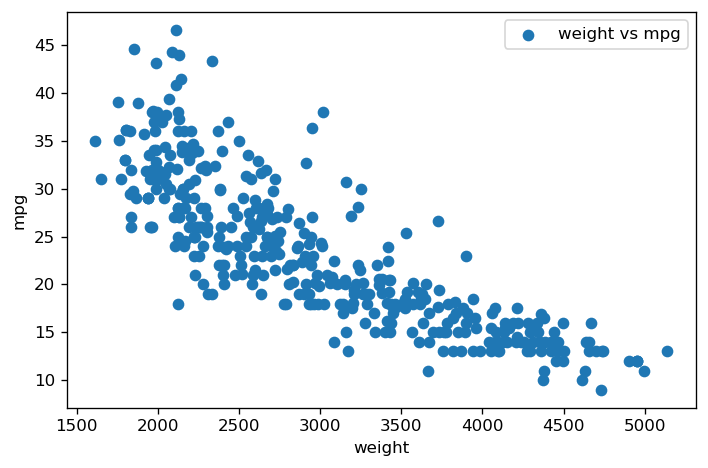

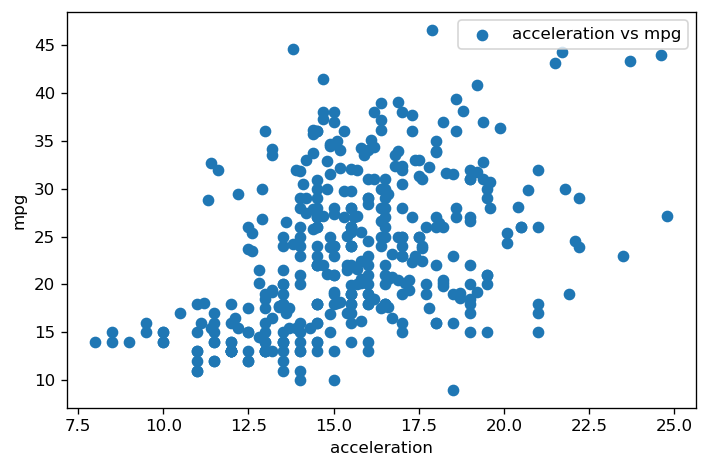

In [4]:
for col in ["cylinders", "displacement", "horsepower", "weight", "acceleration"]:
    plt.figure(dpi=120)
    plt.scatter(col, "mpg", data=mpg, label=f"{col} vs mpg")
    plt.xlabel(col)
    plt.ylabel("mpg")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [5]:
X = mpg[["cylinders", "displacement", "horsepower", "weight", "acceleration"]]
y = mpg["mpg"]

In [17]:
import numpy as np
np.random.seed(121)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Random Split

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)
# Supervise Training

LinearRegression()

In [21]:
model.intercept_

46.26326613843622

In [22]:
model.coef_

array([-0.49202398,  0.00229212, -0.04204999, -0.00548355,  0.00570503])

In [23]:
y_hat = model.predict(X_test)

In [24]:
from sklearn.metrics import r2_score

In [25]:
acc = r2_score(y_test, y_hat)

In [26]:
print(f"Accuracy = {acc:0.2f}")

Accuracy = 0.64


    how to improve accuracy ? 

#### Hyperparameter Tunening

In [30]:
# Linear Regression is very sensitive to scale of features
X[:5]

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130.0,3504,12.0
1,8,350.0,165.0,3693,11.5
2,8,318.0,150.0,3436,11.0
3,8,304.0,150.0,3433,12.0
4,8,302.0,140.0,3449,10.5


In [31]:
y[:5]

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

### Preprocessing Step 

    Scale your training feature before you pass data to model

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
# fit -> xbar, sigma
# transform -> scaled output

# fit_transform()

In [39]:
import pandas as pd

In [40]:
X_tr = scaler.fit_transform(X)
X_tr = pd.DataFrame(X_tr, columns=X.columns, index=X.index)

In [41]:
X[:5]

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130.0,3504,12.0
1,8,350.0,165.0,3693,11.5
2,8,318.0,150.0,3436,11.0
3,8,304.0,150.0,3433,12.0
4,8,302.0,140.0,3449,10.5


In [42]:
X_tr[:5]

,cylinders,displacement,horsepower,weight,acceleration
0,1.483947,1.077290,0.664133,0.620540,-1.285258
1,1.483947,1.488732,1.574594,0.843334,-1.466724
2,1.483947,1.182542,1.184397,0.540382,-1.648189
3,1.483947,1.048584,1.184397,0.536845,-1.285258
4,1.483947,1.029447,0.924265,0.555706,-1.829655


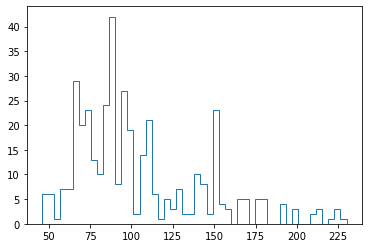

In [44]:
plt.hist(X['horsepower'], bins=50, histtype='step')
plt.show()

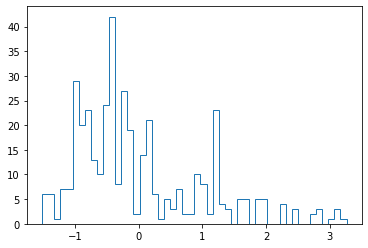

In [45]:
plt.hist(X_tr['horsepower'], bins=50, histtype='step')
plt.show()

In [46]:
model = LinearRegression()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, y)

In [48]:
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_hat = model.predict(X_test)

In [51]:
X_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')

# Linear Regression 

    mpg = bias + w1 * cylinders + w2 * displacement + w3 * horsepower + w4 * weight + w5 * acceleration
    

In [50]:
acc = r2_score(y_test, y_hat)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.72
